# Applying K-means Clustering on AppLogs Data

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
from sklearn.cluster import KMeans

#Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Load and Explore the Dataset

In [3]:
#Load the Dataset
df = pd.read_csv('data/Users-FE.csv')

In [4]:
#View the Dataset
df.head()

,BU,TransCt,Ave Mo TransCt,Earliest Date,First module,Latest Date,Last module,Month Start,Month End,Months Active,...,ActivePastMonths,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend,Plug Ct,BrandID
0,B102,2,2.0,27/01/2019,login,27/01/2019,registration,1,1,1,...,0,0,0,0,0,1,1,1,0,B
1,B115,3,1.5,31/01/2019,login,04/02/2019,registration,1,2,2,...,0,0,0,0,0,1,0,0,0,B
2,B116,1015,203.0,01/02/2019,add_plug,26/06/2019,yearly_consumption,2,6,5,...,5,1,0,0,0,0,0,0,1,B
3,B127,186,62.0,01/02/2019,add_plug,25/04/2019,set_ssid,2,4,3,...,0,0,0,0,0,1,1,0,1,B
4,B131,4,4.0,01/02/2019,add_plug,05/02/2019,set_ssid,2,2,1,...,0,0,0,0,0,1,0,0,0,B


In [5]:
#Describe the data
df.describe(include="all")

,BU,TransCt,Ave Mo TransCt,Earliest Date,First module,Latest Date,Last module,Month Start,Month End,Months Active,...,ActivePastMonths,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend,Plug Ct,BrandID
count,3895,3895.000000,3895.000000,3895,3895,3895,3895,3895.000000,3895.000000,3895.000000,...,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895
unique,3895,NaN,NaN,350,12,355,21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,S3949,NaN,NaN,04/08/2018,add_plug,29/06/2019,registration,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,1,NaN,NaN,40,1240,94,2358,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3632
mean,NaN,60.370988,18.655116,NaN,NaN,NaN,NaN,6.684981,6.349936,1.998973,...,0.430295,0.058280,0.019255,0.008729,0.001797,0.838254,0.361746,0.257253,0.316560,NaN
std,NaN,195.521947,44.717535,NaN,NaN,NaN,NaN,3.231064,3.050678,2.181775,...,1.398769,0.234302,0.137439,0.093033,0.042360,0.368265,0.480567,0.437176,0.505918,NaN
min,NaN,1.000000,0.200000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,7.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,29.000000,14.000000,NaN,NaN,NaN,NaN,9.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 23 columns):
BU                   3895 non-null object
TransCt              3895 non-null int64
Ave Mo TransCt       3895 non-null float64
Earliest Date        3895 non-null object
First module         3895 non-null object
Latest Date          3895 non-null object
Last module          3895 non-null object
Month Start          3895 non-null int64
Month End            3895 non-null int64
Months Active        3895 non-null int64
Days Active          3895 non-null int64
Month Last Active    3895 non-null int64
Days Last Active     3895 non-null int64
ActivePastMonths     3895 non-null int64
ActiveLast3Mos       3895 non-null int64
ActiveLast6Mos       3895 non-null int64
ActiveLast9Mos       3895 non-null int64
ActiveLast12Mos      3895 non-null int64
NotActive            3895 non-null int64
isAM                 3895 non-null int64
isWeekend            3895 non-null int64
Plug Ct              3895

In [7]:
#Get the correlation of the data
corr=df.corr()
corr

,TransCt,Ave Mo TransCt,Month Start,Month End,Months Active,Days Active,Month Last Active,Days Last Active,ActivePastMonths,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend,Plug Ct
TransCt,1.000000,0.805066,0.003537,-0.068025,0.475687,0.491769,-0.253025,-0.262897,0.592095,0.551239,0.481457,0.425957,0.144036,-0.347215,-0.126402,-0.138792,0.385001
Ave Mo TransCt,0.805066,1.000000,-0.096106,-0.071440,0.236623,0.260784,-0.258731,-0.270123,0.385869,0.419878,0.208748,0.158077,0.039552,-0.330676,-0.146203,-0.135130,0.443220
Month Start,0.003537,-0.096106,1.000000,0.734946,0.139223,0.134711,0.476569,0.474033,-0.047163,-0.096844,0.083058,0.058701,0.004137,0.125941,0.069440,0.043205,-0.028212
Month End,-0.068025,-0.071440,0.734946,1.000000,-0.169133,-0.167198,0.547344,0.541069,-0.035296,-0.028539,-0.016075,-0.010766,-0.004868,0.050394,0.113498,0.066116,-0.138515
Months Active,0.475687,0.236623,0.139223,-0.169133,1.000000,0.993931,-0.329828,-0.330249,0.497801,0.427629,0.426560,0.356828,0.194525,-0.288504,-0.169381,-0.127881,0.490035
Days Active,0.491769,0.260784,0.134711,-0.167198,0.993931,1.000000,-0.336609,-0.340755,0.519233,0.443969,0.438393,0.367882,0.202288,-0.312645,-0.169498,-0.132106,0.501027
Month Last Active,-0.253025,-0.258731,0.476569,0.547344,-0.329828,-0.336609,1.000000,0.996873,-0.370315,-0.299429,-0.168653,-0.112950,-0.051072,0.528718,0.129243,0.122687,-0.339422
Days Last Active,-0.262897,-0.270123,0.474033,0.541069,-0.330249,-0.340755,0.996873,1.000000,-0.384981,-0.312332,-0.176908,-0.119208,-0.054598,0.544871,0.127375,0.126699,-0.345356
ActivePastMonths,0.592095,0.385869,-0.047163,-0.035296,0.497801,0.519233,-0.370315,-0.384981,1.000000,0.856704,0.794448,0.651960,0.351009,-0.700402,-0.083393,-0.134451,0.376844
ActiveLast3Mos,0.551239,0.419878,-0.096844,-0.028539,0.427629,0.443969,-0.299429,-0.312332,0.856704,1.000000,0.563249,0.377217,0.170564,-0.566330,-0.082372,-0.128856,0.353436


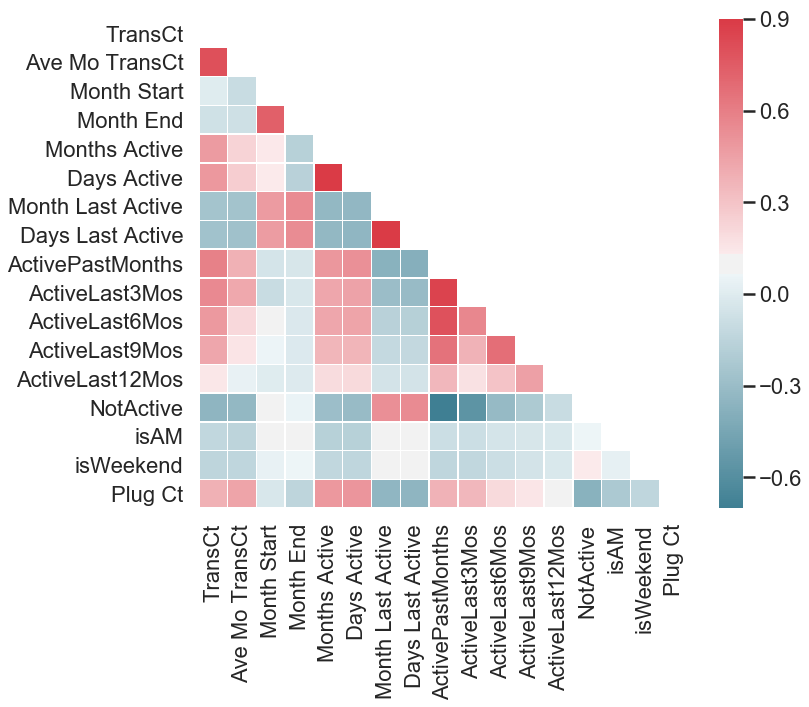

In [8]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Text(0,0.5,'TransCt')

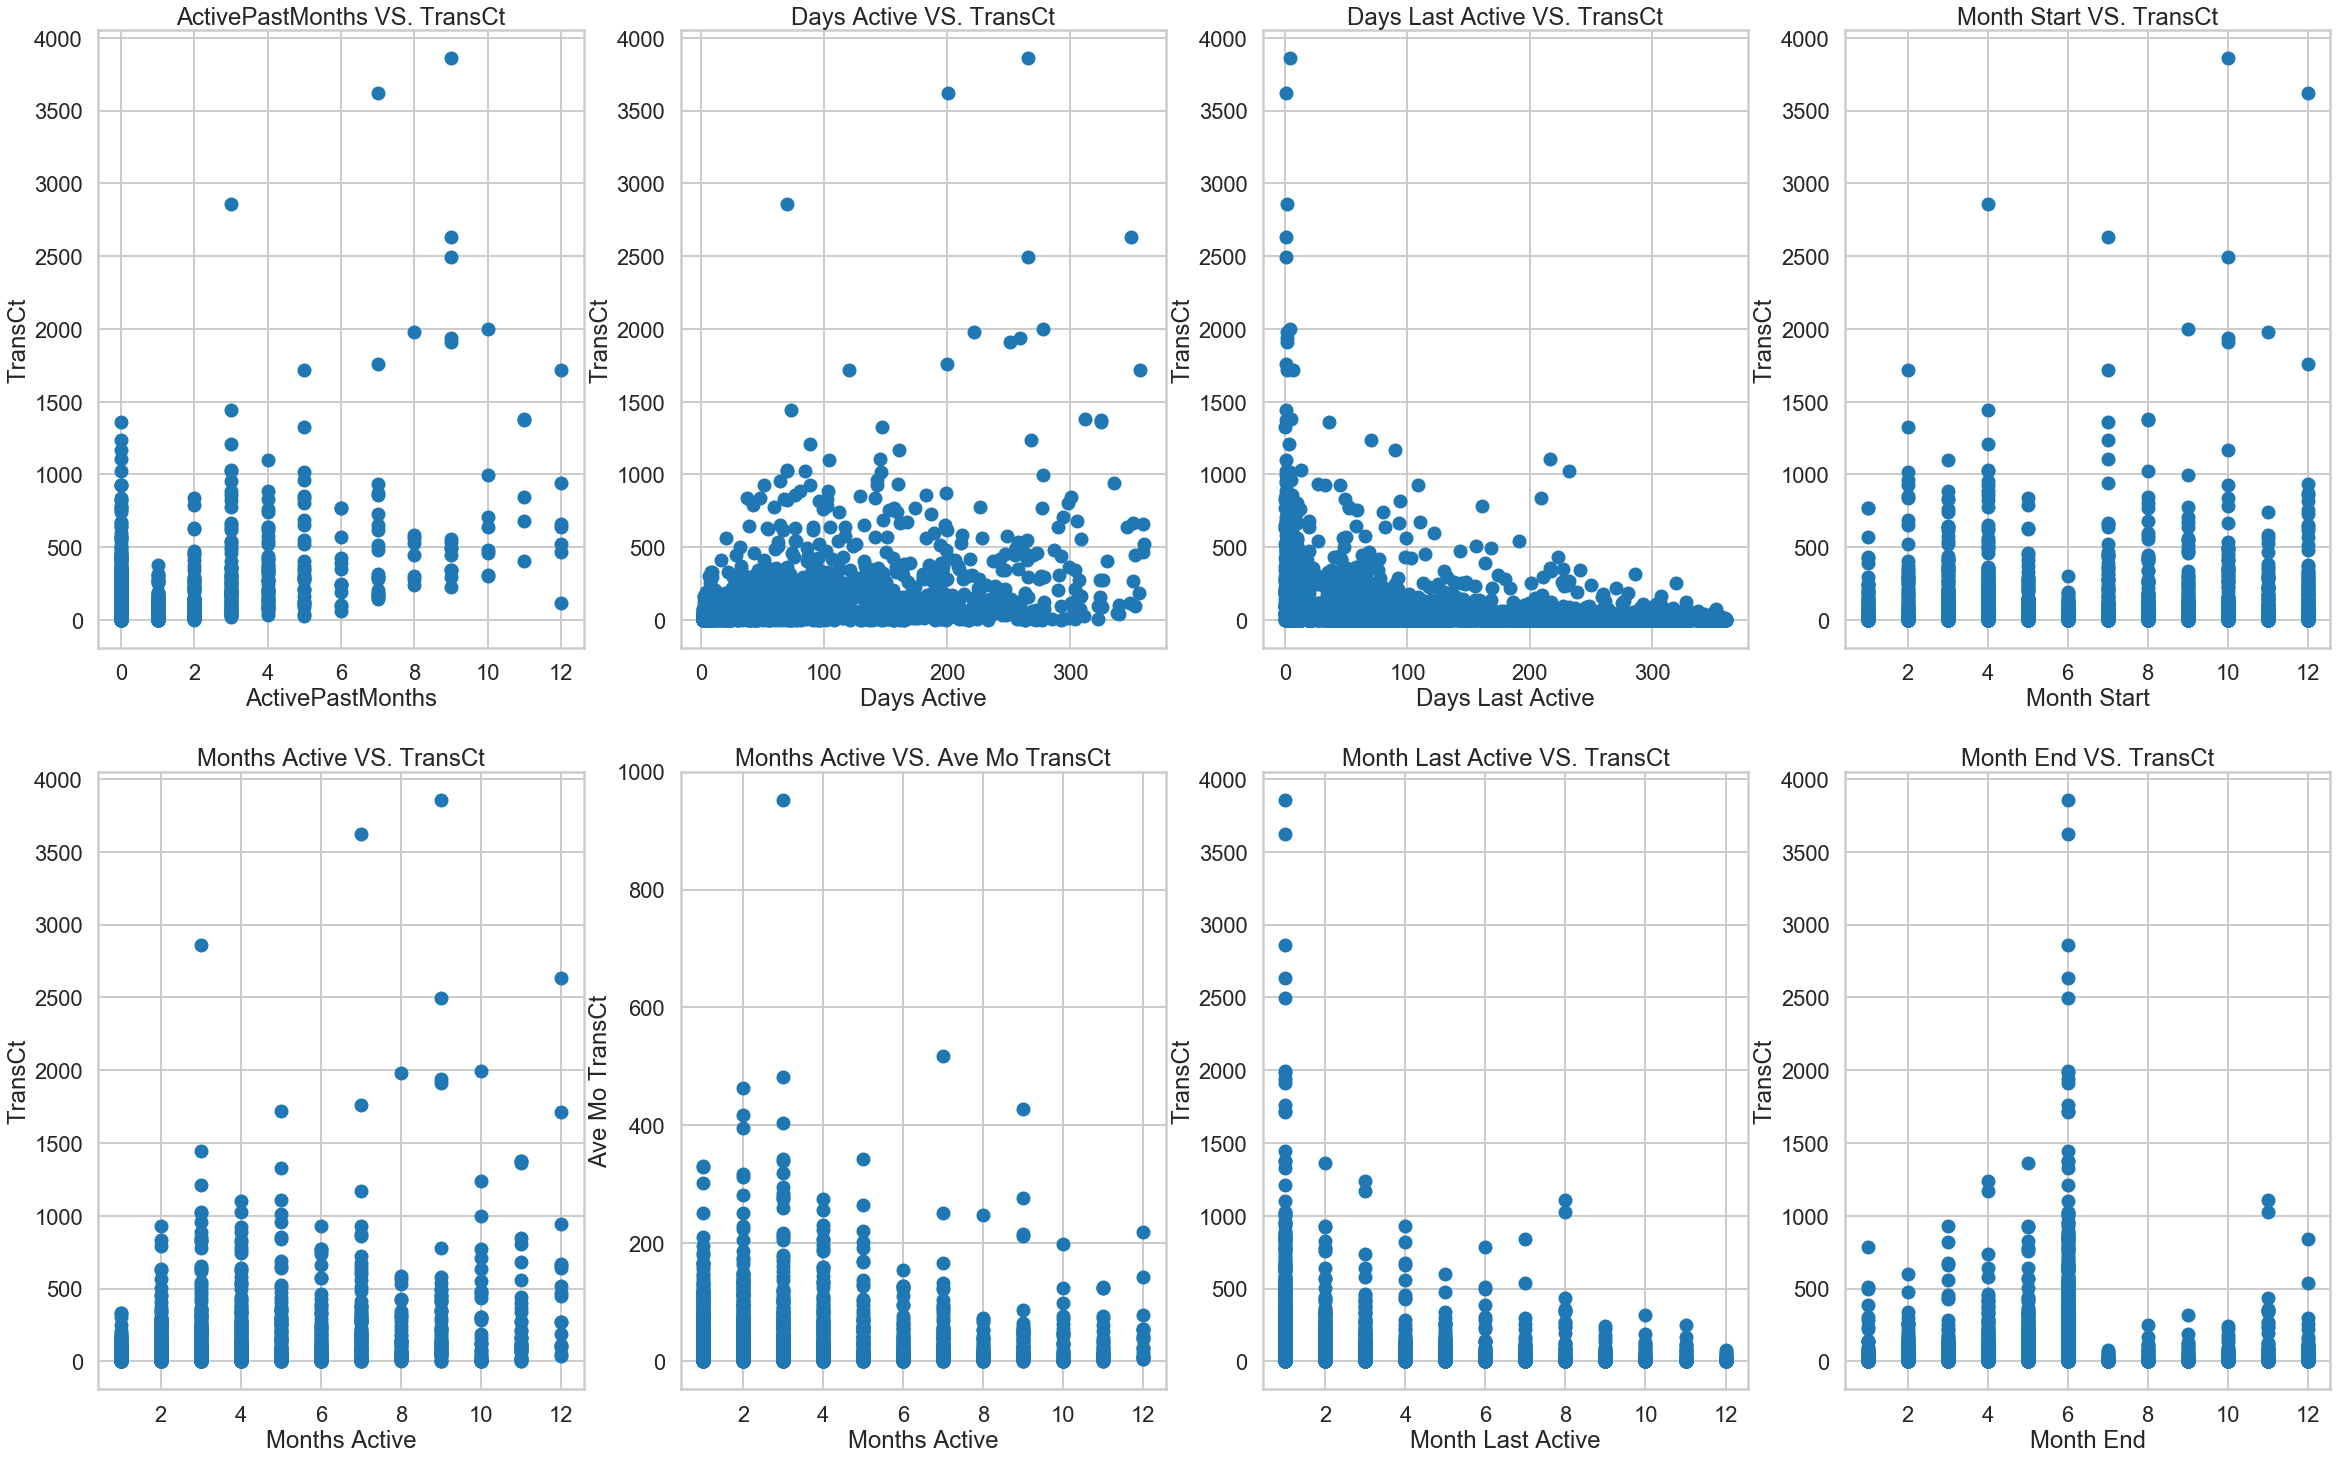

In [9]:
#Visualize the relationship among the variables:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(40, 25))

x = 'ActivePastMonths'
y = 'TransCt'
axes[0,0].scatter(x=df[x], y=df[y])
axes[0,0].set_title(x + ' VS. ' + y)
axes[0,0].set_xlabel(x)
axes[0,0].set_ylabel(y)

x = 'Days Active'
y = 'TransCt'
axes[0,1].scatter(x=df[x], y=df[y])
axes[0,1].set_title(x + ' VS. ' + y)
axes[0,1].set_xlabel(x)
axes[0,1].set_ylabel(y)

x = 'Days Last Active'
y = 'TransCt'
axes[0,2].scatter(x=df[x], y=df[y])
axes[0,2].set_title(x + ' VS. ' + y)
axes[0,2].set_xlabel(x)
axes[0,2].set_ylabel(y)

x = 'Month Start'
y = 'TransCt'
axes[0,3].scatter(x=df[x], y=df[y])
axes[0,3].set_title(x + ' VS. ' + y)
axes[0,3].set_xlabel(x)
axes[0,3].set_ylabel(y)

x = 'Months Active'
y = 'TransCt'
axes[1,0].scatter(x=df[x], y=df[y])
axes[1,0].set_title(x + ' VS. ' + y)
axes[1,0].set_xlabel(x)
axes[1,0].set_ylabel(y)

x = 'Months Active'
y = 'Ave Mo TransCt'
axes[1,1].scatter(x=df[x], y=df[y])
axes[1,1].set_title(x + ' VS. ' + y)
axes[1,1].set_xlabel(x)
axes[1,1].set_ylabel(y)

x = 'Month Last Active'
y = 'TransCt'
axes[1,2].scatter(x=df[x], y=df[y])
axes[1,2].set_title(x + ' VS. ' + y)
axes[1,2].set_xlabel(x)
axes[1,2].set_ylabel(y)

x = 'Month End'
y = 'TransCt'
axes[1,3].scatter(x=df[x], y=df[y])
axes[1,3].set_title(x + ' VS. ' + y)
axes[1,3].set_xlabel(x)
axes[1,3].set_ylabel(y)

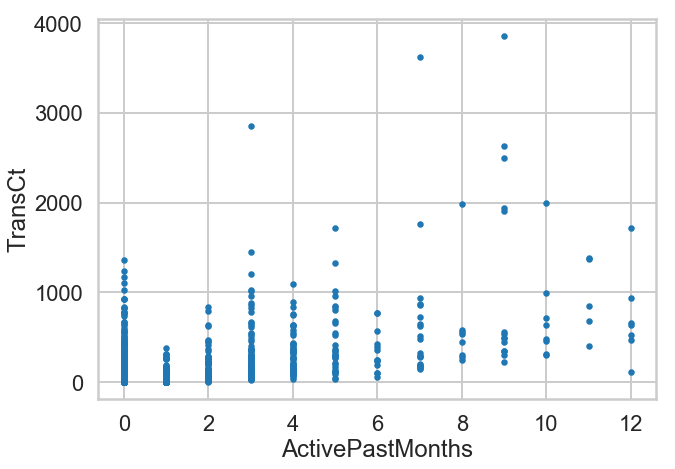

In [10]:
#Plot/Visualize the Data
df.plot(x='ActivePastMonths', y='TransCt',kind='scatter', figsize=(10,7))

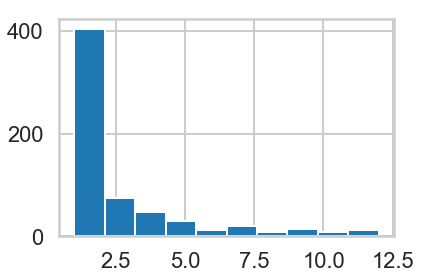

In [11]:
df_apm=df.loc[df['ActivePastMonths']>0]
df_apm['ActivePastMonths'].hist()

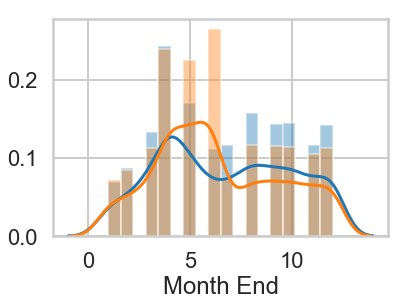

In [12]:
#Visualizing the data - displot
plot_x = sns.distplot(df["Month Start"])
plot_y = sns.distplot(df["Month End"])
#plt.xlabel('4PM / 10AM')

In [13]:
#Remove the ff cols: ['Ave Mo TransCt', 'Days Active', 'Days Last Active']

In [14]:
df_to_cluster = df.iloc[:,[1,7,8,9,11,13,14,15,16,17,18,19,20]]
df_to_cluster.head()

,TransCt,Month Start,Month End,Months Active,Month Last Active,ActivePastMonths,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend
0,2,1,1,1,6,0,0,0,0,0,1,1,1
1,3,1,2,2,5,0,0,0,0,0,1,0,0
2,1015,2,6,5,1,5,1,0,0,0,0,0,0
3,186,2,4,3,3,0,0,0,0,0,1,1,0
4,4,2,2,1,5,0,0,0,0,0,1,0,0


## Scale

In [ ]:
df_transposed = df.T # or df.transpose()
df_transposed.head()

In [ ]:
#Instantiate the MinMax Scaler
minmax = MinMaxScaler()

#Fit the scaler using available data
minmax.fit(df_transposed)

#Apply the scale to training data.
nd_scaled = minmax.transform(df_transposed)

In [ ]:
df_scaled = pd.DataFrame(nd_scaled, index=df.columns, columns=df.index)
df_scaled.head()

In [ ]:
df_scaled.describe()

In [ ]:
#transpose data
df_sc_t = df_scaled.T # or df_scaled.transpose()
df_sc_t.head()

In [ ]:
df_sc_t.describe()

## Normalize

In [ ]:
normalizer = Normalizer()
arr_nrmlzd = normalizer.fit_transform(df)
df_normalized = pd.DataFrame(arr_nrmlzd, columns=df.columns, index=df.index)
df_normalized.head()

In [ ]:
df_normalized.describe()

## Identify cluster via K-Means

### Use Elbow Method to Determine Optimal K

#### _Compute the Sum of Squared Errors (sse) for k = 1 to k = 11_

In [15]:
sse = []

range_of_clusters = range(2,16)

for i in range_of_clusters:
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(df_to_cluster)
    sse.append(km.inertia_)
    print(str(i) +"\t" +str(km.inertia_))

2	61029052.58424403
3	29491663.028572865
4	16210855.876072062
5	10481473.968009502
6	7170477.388042298
7	5239742.311269998
8	3842941.4140802207
9	2854562.2973811086
10	2148387.0269898325
11	1703873.0546411772
12	1412716.451367022
13	1163089.8388880766
14	999833.5763453774
15	892633.5005290438


Text(0,0.5,'sse')

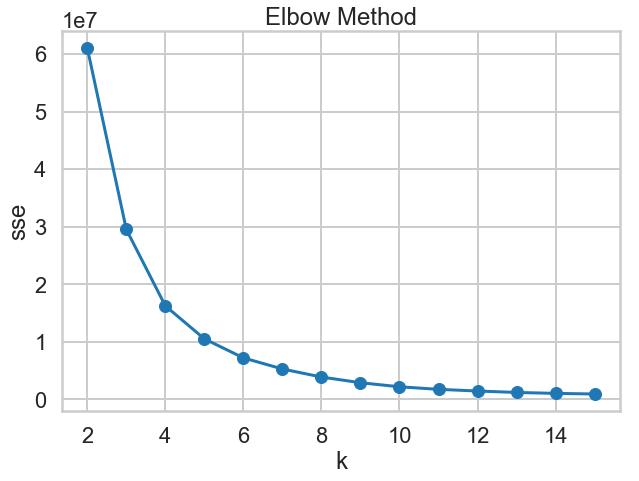

In [16]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_of_clusters, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("sse")

In [54]:
##Fitting kmeans to the dataset with k=5
km=KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=15)
y_means = km.fit_predict(df_to_cluster)

In [55]:
## Add the labels to the original dataframe
df_k = df.copy()
df_k['Cluster'] = y_means

In [56]:
df_k.head()

,BU,TransCt,Ave Mo TransCt,Earliest Date,First module,Latest Date,Last module,Month Start,Month End,Months Active,...,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend,Plug Ct,BrandID,Cluster
0,B102,2,2.0,27/01/2019,login,27/01/2019,registration,1,1,1,...,0,0,0,0,1,1,1,0,B,0
1,B115,3,1.5,31/01/2019,login,04/02/2019,registration,1,2,2,...,0,0,0,0,1,0,0,0,B,0
2,B116,1015,203.0,01/02/2019,add_plug,26/06/2019,yearly_consumption,2,6,5,...,1,0,0,0,0,0,0,1,B,1
3,B127,186,62.0,01/02/2019,add_plug,25/04/2019,set_ssid,2,4,3,...,0,0,0,0,1,1,0,1,B,4
4,B131,4,4.0,01/02/2019,add_plug,05/02/2019,set_ssid,2,2,1,...,0,0,0,0,1,0,0,0,B,0


In [57]:
df_k.to_csv("data/Clustered.csv")

In [58]:
#Check the size of each cluster
df_k.Cluster.value_counts()

0    3474
4     311
1      90
3      15
2       5
Name: Cluster, dtype: int64

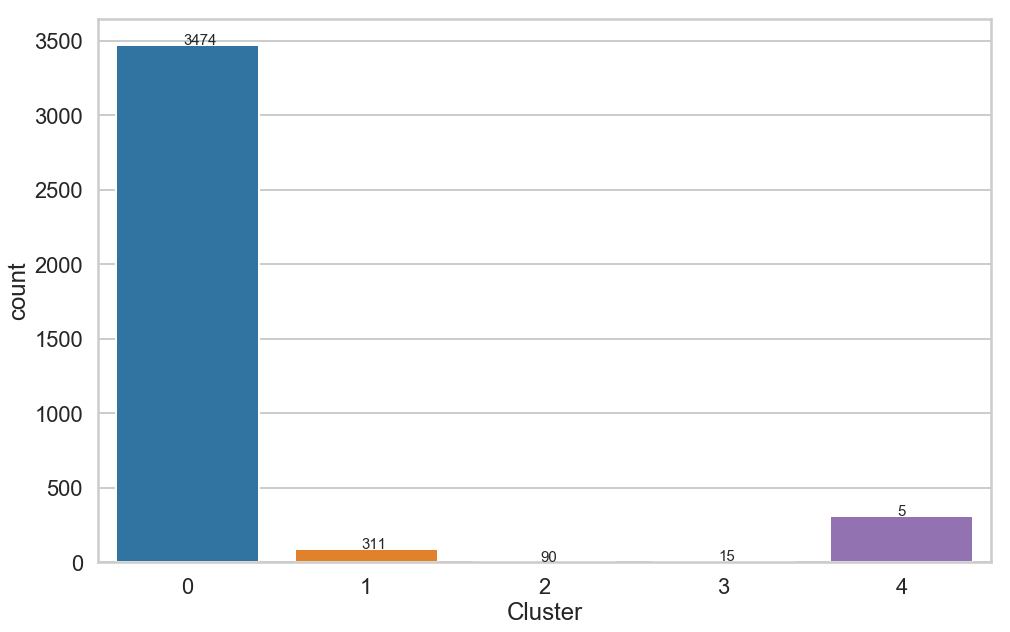

In [59]:
# Number of stocks in each cluster
plt.figure(figsize= (16,10))
ax = sns.countplot(x = df_k.Cluster, data =df_k)
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Number of Users in each CLuster'

for p, label in zip(ax.patches, df_k["Cluster"].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15), size=15)

plt.savefig('cluster_counts.png')

## Visualize the Clusters

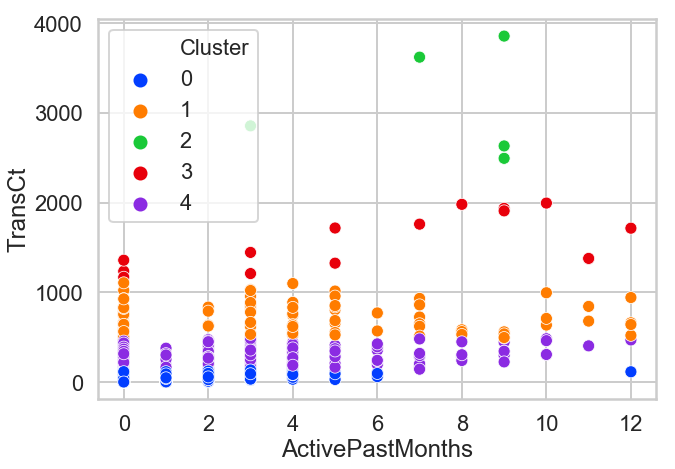

In [60]:
#Visualizing the clusters for k

#Set a color palette
bright_colors = sns.color_palette("bright", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_k['ActivePastMonths'], y=df_k['TransCt'], hue=df_k.Cluster, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
#sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

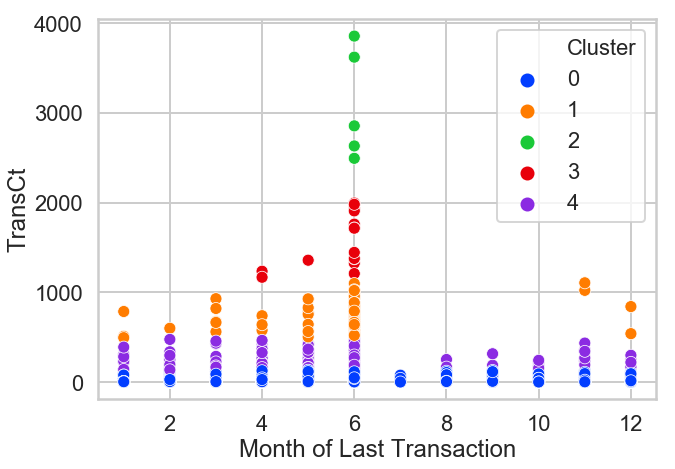

In [61]:
#Visualizing the clusters for k

#Set a color palette
bright_colors = sns.color_palette("bright", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_k['Month End'], y=df_k['TransCt'], hue=df_k.Cluster, 
                palette=bright_colors)

ax.set_xlabel("Month of Last Transaction")

#Add on the cluster centers
centers = km.cluster_centers_
#sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

fig.savefig('clustering_transct_monthEnd.png')

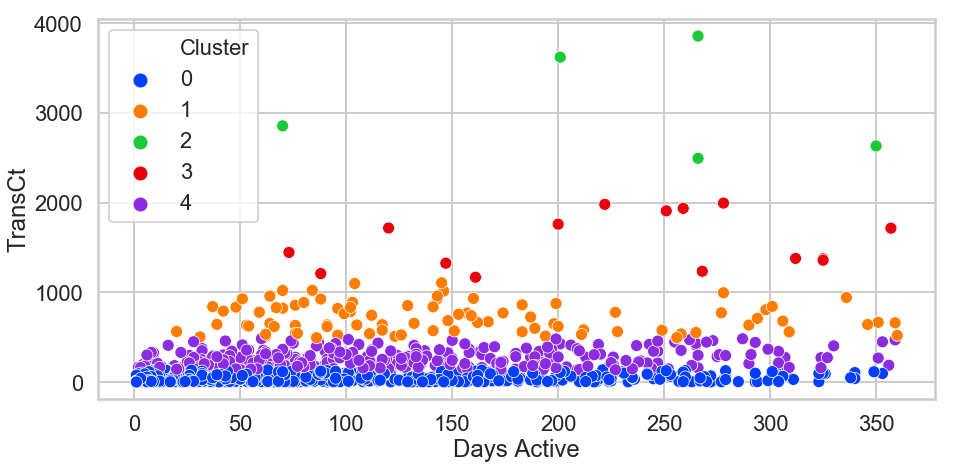

In [62]:
#Visualizing the clusters for k

#Set a color palette
bright_colors = sns.color_palette("bright", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(15,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_k['Days Active'], y=df_k['TransCt'], hue=df_k.Cluster, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
#sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

fig.savefig('clustering_transct_daysActive.png')

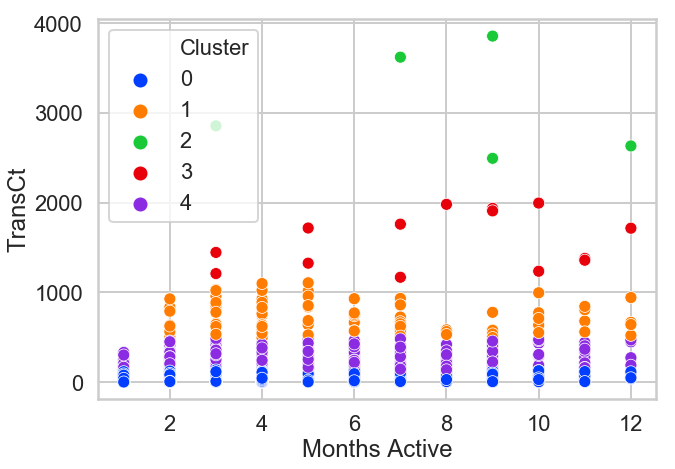

In [63]:
#Visualizing the clusters for k

#Set a color palette
bright_colors = sns.color_palette("bright", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_k['Months Active'], y=df_k['TransCt'], hue=df_k.Cluster, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
#sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

fig.savefig('clustering_transct_monthsActiveto_csv.png')

In [64]:
#Check the size of each cluster
df_k.Cluster.value_counts()

0    3474
4     311
1      90
3      15
2       5
Name: Cluster, dtype: int64

### View 1 cluster

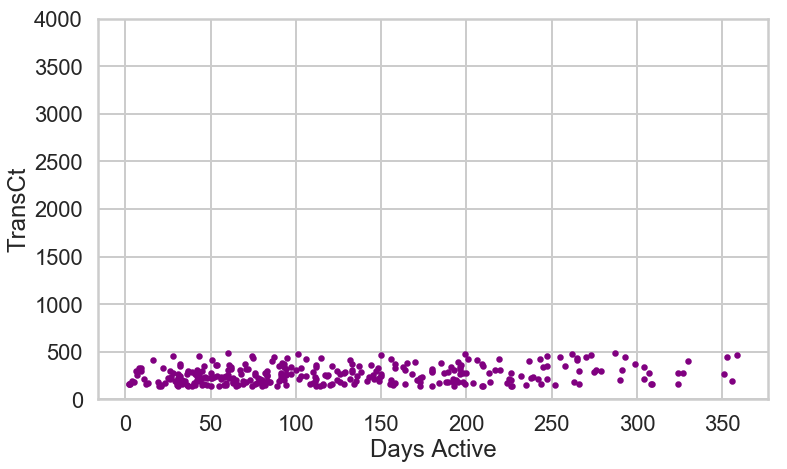

In [28]:
#Analyze a cluster
df_k_sel = df_k.loc[(df_k['Cluster']==4)]
ax = df_k_sel.plot.scatter(x="Days Active", y="TransCt",figsize=(12,7), color="Purple")
plt.ylim(0, 4000)

figure = ax.get_figure()

figure.savefig('cluster4.png')

### Compare 2 clusters

In [29]:
df_c0 = df_k.loc[(df_k['Cluster']==0)]
df_c1 = df_k.loc[(df_k['Cluster']==1)]
df_c2 = df_k.loc[(df_k['Cluster']==2)]
df_c3 = df_k.loc[(df_k['Cluster']==3)]
df_c4 = df_k.loc[(df_k['Cluster']==4)]
df_c5 = df_k.loc[(df_k['Cluster']==5)]

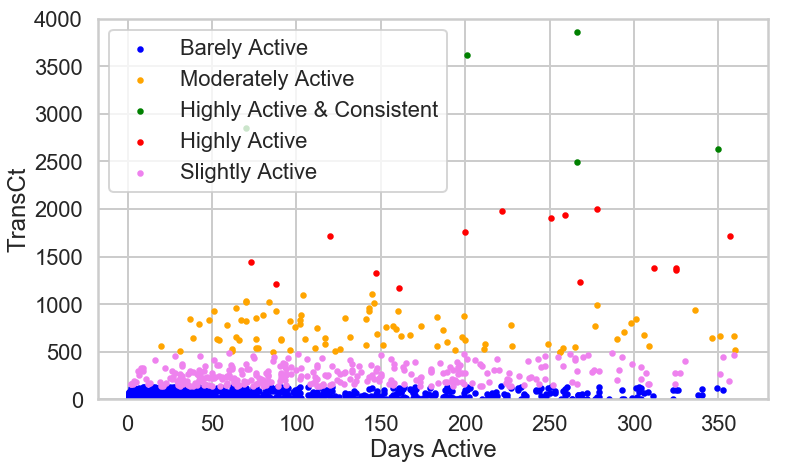

In [38]:
#Main
ax = df_c0.plot.scatter(x='Days Active', y='TransCt', color='Blue', label='Barely Active', figsize=(12,7));
#ax = df_c1.plot.scatter(x='Days Active', y='TransCt', color='Orange', label='Cluster 1'); 
#ax = df_c2.plot.scatter(x='Days Active', y='TransCt', color='Green', label='Cluster 2'); 
#ax = df_c3.plot.scatter(x='Days Active', y='TransCt', color='Red', label='Cluster 3'); 
#ax = df_c4.plot.scatter(x='Days Active', y='TransCt', color='Violet', label='Cluster 4'); 

#Second
df_c1.plot.scatter(x='Days Active', y='TransCt', color='Orange', label='Moderately Active', ax=ax, figsize=(12,7));
df_c2.plot.scatter(x='Days Active', y='TransCt', color='Green', label='Highly Active & Consistent', ax=ax, figsize=(12,7));
df_c3.plot.scatter(x='Days Active', y='TransCt', color='Red', label='Highly Active', ax=ax, figsize=(12,7));
df_c4.plot.scatter(x='Days Active', y='TransCt', color='Violet', label='Slightly Active', ax=ax, figsize=(12,7));

plt.ylim(0, 4000)
figure_combined = ax.get_figure()

figure_combined.savefig('clustering-step4.png')

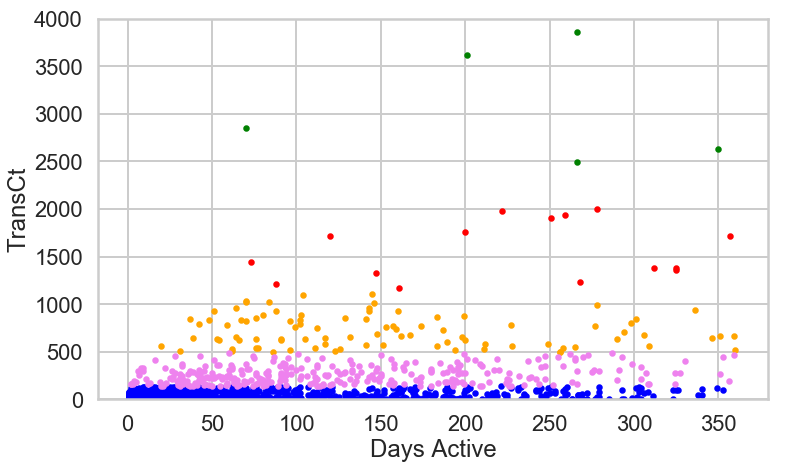

In [44]:
#Main
ax = df_c0.plot.scatter(x='Days Active', y='TransCt', color='Blue', figsize=(12,7));
#ax = df_c1.plot.scatter(x='Days Active', y='TransCt', color='Orange', label='Cluster 1'); 
#ax = df_c2.plot.scatter(x='Days Active', y='TransCt', color='Green', label='Cluster 2'); 
#ax = df_c3.plot.scatter(x='Days Active', y='TransCt', color='Red', label='Cluster 3'); 
#ax = df_c4.plot.scatter(x='Days Active', y='TransCt', color='Violet', label='Cluster 4'); 

#Second
df_c1.plot.scatter(x='Days Active', y='TransCt', color='Orange', ax=ax, figsize=(12,7));
df_c2.plot.scatter(x='Days Active', y='TransCt', color='Green', ax=ax, figsize=(12,7));
df_c3.plot.scatter(x='Days Active', y='TransCt', color='Red', ax=ax, figsize=(12,7));
df_c4.plot.scatter(x='Days Active', y='TransCt', color='Violet', ax=ax, figsize=(12,7));

plt.ylim(0, 4000)
figure_combined = ax.get_figure()

figure_combined.savefig('clustering-step4.png')

In [31]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k, index = ['Cluster'], values = df_k.columns, 
               aggfunc=[np.mean,np.min, np.max])

mean                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0              0.000288       0.012666       0.001151       0.000288   
1              0.044444       0.666667       0.288889       0.144444   
2              0.000000       1.000000       0.800000       0.600000   
3              0.066667       0.800000       0.533333       0.400000   
4              0.003215       0.340836       0.106109       0.035370   

                                                                      \
        ActivePastMonths Ave Mo TransCt Days Active Days Last Active   
Cluster                                                                
0               0.166379       8.560072   19.586931       156.238342   
1               4.066667     161.984616  152.422222        32.966667   
2               7.400000     479.042063  230.600000         1.800000   
3               6.200000     228.526479  225.733333        15.066667   
4               1.935691      72.418854  125.954984        54.315113   

                                     ...        amax            \
        Month End Month Last Active  ... Latest Date Month End   
Cluster                              ...                         
0        6.452504          5.701209  ...  31/12/2018        12   
1        5.688889          1.844444  ...  30/06/2019        12   
2        6.000000          1.000000  ...  29/06/2019         6   
3        5.666667          1.333333  ...  30/06/2019         6   
4        5.434084          2.453376  ...  30/06/2019        12   

                                                                               \
        Month Last Active Month Start Months Active NotActive Plug Ct TransCt   
Cluster                                                                         
0                      12          12            12         1       5     136   
1                       8          12            12         1       2    1107   
2                       1          12            12         0       1    3858   
3                       3          12            12         1       3    1996   
4                      11          12            12         1       3     485   

                        
        isAM isWeekend  
Cluster                 
0          1         1  
1          1         0  
2          0         0  
3          1         0  
4          1         1  

[5 rows x 63 columns]

In [32]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k, index = ['Cluster'], values = df_k.columns, 
               aggfunc=[np.mean])

mean                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0              0.000288       0.012666       0.001151       0.000288   
1              0.044444       0.666667       0.288889       0.144444   
2              0.000000       1.000000       0.800000       0.600000   
3              0.066667       0.800000       0.533333       0.400000   
4              0.003215       0.340836       0.106109       0.035370   

                                                                      \
        ActivePastMonths Ave Mo TransCt Days Active Days Last Active   
Cluster                                                                
0               0.166379       8.560072   19.586931       156.238342   
1               4.066667     161.984616  152.422222        32.966667   
2               7.400000     479.042063  230.600000         1.800000   
3               6.200000     228.526479  225.733333        15.066667   
4               1.935691      72.418854  125.954984        54.315113   

                                                                         \
        Month End Month Last Active Month Start Months Active NotActive   
Cluster                                                                   
0        6.452504          5.701209    6.698330      1.600461  0.886010   
1        5.688889          1.844444    6.500000      5.788889  0.288889   
2        6.000000          1.000000    8.600000      8.000000  0.000000   
3        5.666667          1.333333    7.400000      8.066667  0.200000   
4        5.434084          2.453376    6.524116      4.964630  0.508039   

                                                    
          Plug Ct      TransCt      isAM isWeekend  
Cluster                                             
0        0.237191    14.687968  0.382556  0.283823  
1        0.944444   718.166667  0.188889  0.000000  
2        1.000000  3093.200000  0.000000  0.000000  
3        1.066667  1567.933333  0.066667  0.000000  
4        0.974277   258.839228  0.199357  0.051447

In [33]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k, index = ['Cluster'], values = df_k.columns, 
               aggfunc=[np.min])

amin                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0                     0              0              0              0   
1                     0              0              0              0   
2                     0              1              0              0   
3                     0              0              0              0   
4                     0              0              0              0   

                                                                    \
        ActivePastMonths Ave Mo TransCt     BU BrandID Days Active   
Cluster                                                              
0                      0       0.200000   B102       B           1   
1                      0      43.416667   B116       B          20   
2                      3     219.416667  S2149       S          70   
3                      0     123.545454   B138       B          73   
4                      0      14.363636   B127       B           2   

                          ...                                          \
        Days Last Active  ... Latest Date Month End Month Last Active   
Cluster                   ...                                           
0                      0  ...  01/01/2019         1                 1   
1                      0  ...  02/05/2019         1                 1   
2                      1  ...  26/06/2019         6                 1   
3                      0  ...  01/04/2019         4                 1   
4                      0  ...  01/01/2019         1                 1   

                                                                            
        Month Start Months Active NotActive Plug Ct TransCt isAM isWeekend  
Cluster                                                                     
0                 1             1         0       0       1    0         0  
1                 1             2         0       0     492    0         0  
2                 4             3         0       1    2495    0         0  
3                 2             3         0       0    1169    0         0  
4                 1             1         0       0     137    0         0  

[5 rows x 23 columns]

In [34]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k, index = ['Cluster'], values = df_k.columns, 
               aggfunc=[np.max])

amax                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0                     1              1              1              1   
1                     1              1              1              1   
2                     0              1              1              1   
3                     1              1              1              1   
4                     1              1              1              1   

                                                                   \
        ActivePastMonths Ave Mo TransCt    BU BrandID Days Active   
Cluster                                                             
0                     12     133.000000  S998       S         353   
1                     12     464.000000  S886       S         360   
2                      9     952.333333  S906       S         350   
3                     12     482.000000  S814       S         357   
4                     12     331.000000  S966       S         359   

                          ...                                          \
        Days Last Active  ... Latest Date Month End Month Last Active   
Cluster                   ...                                           
0                    360  ...  31/12/2018        12                12   
1                    232  ...  30/06/2019        12                 8   
2                      4  ...  29/06/2019         6                 1   
3                     90  ...  30/06/2019         6                 3   
4                    319  ...  30/06/2019        12                11   

                                                                            
        Month Start Months Active NotActive Plug Ct TransCt isAM isWeekend  
Cluster                                                                     
0                12            12         1       5     136    1         1  
1                12            12         1       2    1107    1         0  
2                12            12         0       1    3858    0         0  
3                12            12         1       3    1996    1         0  
4                12            12         1       3     485    1         1  

[5 rows x 23 columns]

## Try a sliced dataset

### Use Feature Selection: Filter out low variance

In [66]:
features = df_to_cluster
features.var().sort_values()[:60]

ActiveLast12Mos          0.001794
ActiveLast9Mos           0.008655
ActiveLast6Mos           0.018890
ActiveLast3Mos           0.054897
NotActive                0.135619
isWeekend                0.191123
isAM                     0.230945
ActivePastMonths         1.956555
Months Active            4.760143
Month End                9.306635
Month Start             10.439772
Month Last Active       12.944290
TransCt              38228.831772
dtype: float64

In [67]:
#Import the VarianceThreshold Function
from sklearn.feature_selection import VarianceThreshold

#Instantiate the Function and Set the Threshold
selector = VarianceThreshold(0.5)

In [68]:
#Apply the Function to filter out the Low Variance Columns/Features
filtered_features = pd.DataFrame(selector.fit_transform(features), index=features.index)

In [69]:
#Note, the DataFrame Created has no Column Names
filtered_features.head()

,0,1,2,3,4,5
0,2,1,1,1,6,0
1,3,1,2,2,5,0
2,1015,2,6,5,1,5
3,186,2,4,3,3,0
4,4,2,2,1,5,0


In [70]:
#Use this attribute to get Column Names
selected = selector.get_support()  #stores the features that were retained

#Rename the columns
filtered_features.columns = features.columns[selected]

In [71]:
filtered_features.head()

,TransCt,Month Start,Month End,Months Active,Month Last Active,ActivePastMonths
0,2,1,1,1,6,0
1,3,1,2,2,5,0
2,1015,2,6,5,1,5
3,186,2,4,3,3,0
4,4,2,2,1,5,0


In [72]:
filtered_features.var().sort_values()

ActivePastMonths         1.956555
Months Active            4.760143
Month End                9.306635
Month Start             10.439772
Month Last Active       12.944290
TransCt              38228.831772
dtype: float64

In [73]:
sse = []

range_of_clusters= range(2,9)

for i in range_of_clusters:
    km=KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    km.fit(filtered_features)
    sse.append(km.inertia_)
    print(str(i) +"\t" +str(km.inertia_))

2	61026665.26113846
3	29489318.73667349
4	16208567.614539452
5	10479192.233236408
6	7168778.847293177
7	5237526.223799717
8	3840696.734953663


TypeError: 'str' object is not callable

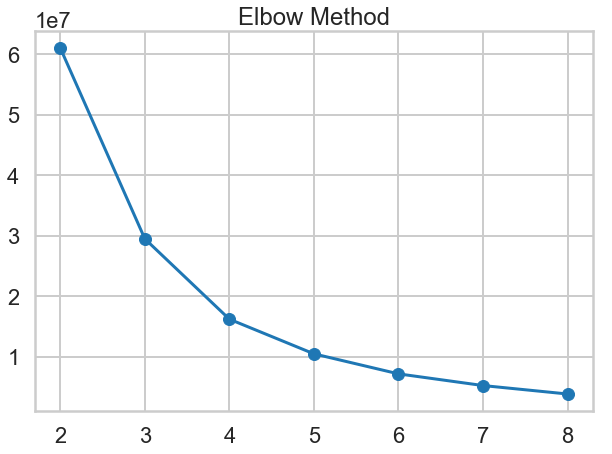

In [74]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_of_clusters, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel("k")
plt.ylabel("sse")

In [79]:
##Fitting kmeans to the dataset with k=2
km=KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=15)
y_means = km.fit_predict(filtered_features)

In [80]:
## Add the labels to the original dataframe
sliced_k = df.copy()
sliced_k['Cluster'] = y_means

In [81]:
#Check the size of each cluster
sliced_k.Cluster.value_counts()

0    3474
4     311
1      90
3      15
2       5
Name: Cluster, dtype: int64

In [82]:
sliced_k.to_csv("data/Clustered.csv")

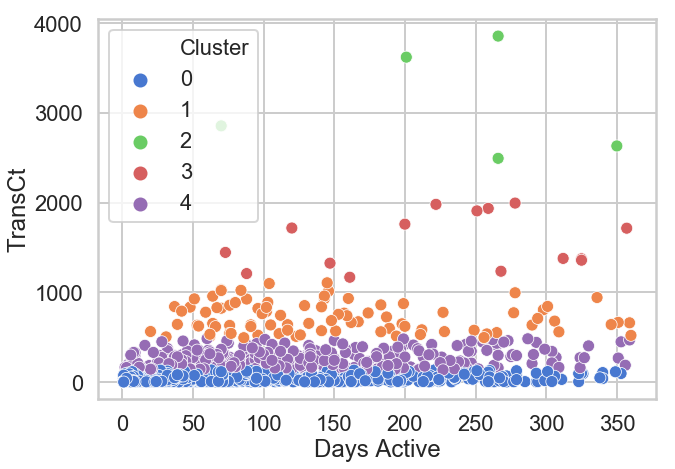

In [83]:
#Visualizing the clusters for k=4

#Set a color palette
bright_colors = sns.color_palette("muted", 5)

#Set figure size
fig, ax = plt.subplots(figsize=(10,7))

#Build the first plot 
sns.scatterplot(ax = ax, x=df_k['Days Active'], y=df_k['TransCt'], hue=sliced_k.Cluster, 
                palette=bright_colors)

#Add on the cluster centers
centers = km.cluster_centers_
#sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8, color='cyan')

### Cluster Analysis

In [84]:
#Check the size of each cluster
sliced_k.Cluster.value_counts()

0    3474
4     311
1      90
3      15
2       5
Name: Cluster, dtype: int64

In [85]:
sliced_k[(sliced_k.Cluster == 0)].describe()

,TransCt,Ave Mo TransCt,Month Start,Month End,Months Active,Days Active,Month Last Active,Days Last Active,ActivePastMonths,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend,Plug Ct,Cluster
count,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.0
mean,14.687968,8.560072,6.698330,6.452504,1.600461,19.586931,5.701209,156.238342,0.166379,0.012666,0.001151,0.000288,0.000288,0.886010,0.382556,0.283823,0.237191,0.0
std,27.220558,15.900090,3.199385,3.146699,1.678220,51.035904,3.568097,108.870656,0.590215,0.111842,0.033918,0.016966,0.016966,0.317844,0.486081,0.450917,0.460522,0.0
min,1.000000,0.200000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,3.000000,3.000000,6.500000,6.000000,1.000000,1.000000,5.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,10.000000,7.000000,9.000000,9.000000,1.000000,5.000000,9.000000,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0
max,136.000000,133.000000,12.000000,12.000000,12.000000,353.000000,12.000000,360.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.0


In [86]:
sliced_k[(sliced_k.Cluster == 1)].describe()

,TransCt,Ave Mo TransCt,Month Start,Month End,Months Active,Days Active,Month Last Active,Days Last Active,ActivePastMonths,ActiveLast3Mos,ActiveLast6Mos,ActiveLast9Mos,ActiveLast12Mos,NotActive,isAM,isWeekend,Plug Ct,Cluster
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,90.0
mean,718.166667,161.984616,6.500000,5.688889,5.788889,152.422222,1.844444,32.966667,4.066667,0.666667,0.288889,0.144444,0.044444,0.288889,0.188889,0.0,0.944444,1.0
std,162.848054,93.983062,3.529172,1.745907,2.916418,89.393082,1.721713,55.399966,3.578337,0.474045,0.455785,0.353509,0.207235,0.455785,0.393613,0.0,0.378082,0.0
min,492.000000,43.416667,1.000000,1.000000,2.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
25%,574.250000,85.896825,3.000000,6.000000,3.250000,77.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.0
50%,669.500000,134.142857,7.000000,6.000000,5.000000,136.500000,1.000000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.0
75%,838.250000,213.666667,9.750000,6.000000,7.000000,199.750000,2.000000,47.750000,6.750000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0
max,1107.000000,464.000000,12.000000,12.000000,12.000000,360.000000,8.000000,232.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.000000,1.0


In [87]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(sliced_k, index = ['Cluster'], values = sliced_k.columns, 
               aggfunc=[np.mean, np.min, np.max])

mean                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0              0.000288       0.012666       0.001151       0.000288   
1              0.044444       0.666667       0.288889       0.144444   
2              0.000000       1.000000       0.800000       0.600000   
3              0.066667       0.800000       0.533333       0.400000   
4              0.003215       0.340836       0.106109       0.035370   

                                                                      \
        ActivePastMonths Ave Mo TransCt Days Active Days Last Active   
Cluster                                                                
0               0.166379       8.560072   19.586931       156.238342   
1               4.066667     161.984616  152.422222        32.966667   
2               7.400000     479.042063  230.600000         1.800000   
3               6.200000     228.526479  225.733333        15.066667   
4               1.935691      72.418854  125.954984        54.315113   

                                     ...        amax            \
        Month End Month Last Active  ... Latest Date Month End   
Cluster                              ...                         
0        6.452504          5.701209  ...  31/12/2018        12   
1        5.688889          1.844444  ...  30/06/2019        12   
2        6.000000          1.000000  ...  29/06/2019         6   
3        5.666667          1.333333  ...  30/06/2019         6   
4        5.434084          2.453376  ...  30/06/2019        12   

                                                                               \
        Month Last Active Month Start Months Active NotActive Plug Ct TransCt   
Cluster                                                                         
0                      12          12            12         1       5     136   
1                       8          12            12         1       2    1107   
2                       1          12            12         0       1    3858   
3                       3          12            12         1       3    1996   
4                      11          12            12         1       3     485   

                        
        isAM isWeekend  
Cluster                 
0          1         1  
1          1         0  
2          0         0  
3          1         0  
4          1         1  

[5 rows x 63 columns]

In [88]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(sliced_k, index = ['Cluster'], values = sliced_k.columns, 
               aggfunc=[np.mean])

mean                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0              0.000288       0.012666       0.001151       0.000288   
1              0.044444       0.666667       0.288889       0.144444   
2              0.000000       1.000000       0.800000       0.600000   
3              0.066667       0.800000       0.533333       0.400000   
4              0.003215       0.340836       0.106109       0.035370   

                                                                      \
        ActivePastMonths Ave Mo TransCt Days Active Days Last Active   
Cluster                                                                
0               0.166379       8.560072   19.586931       156.238342   
1               4.066667     161.984616  152.422222        32.966667   
2               7.400000     479.042063  230.600000         1.800000   
3               6.200000     228.526479  225.733333        15.066667   
4               1.935691      72.418854  125.954984        54.315113   

                                                                         \
        Month End Month Last Active Month Start Months Active NotActive   
Cluster                                                                   
0        6.452504          5.701209    6.698330      1.600461  0.886010   
1        5.688889          1.844444    6.500000      5.788889  0.288889   
2        6.000000          1.000000    8.600000      8.000000  0.000000   
3        5.666667          1.333333    7.400000      8.066667  0.200000   
4        5.434084          2.453376    6.524116      4.964630  0.508039   

                                                    
          Plug Ct      TransCt      isAM isWeekend  
Cluster                                             
0        0.237191    14.687968  0.382556  0.283823  
1        0.944444   718.166667  0.188889  0.000000  
2        1.000000  3093.200000  0.000000  0.000000  
3        1.066667  1567.933333  0.066667  0.000000  
4        0.974277   258.839228  0.199357  0.051447

In [89]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(sliced_k, index = ['Cluster'], values = sliced_k.columns, 
               aggfunc=[np.min])

amin                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0                     0              0              0              0   
1                     0              0              0              0   
2                     0              1              0              0   
3                     0              0              0              0   
4                     0              0              0              0   

                                                                    \
        ActivePastMonths Ave Mo TransCt     BU BrandID Days Active   
Cluster                                                              
0                      0       0.200000   B102       B           1   
1                      0      43.416667   B116       B          20   
2                      3     219.416667  S2149       S          70   
3                      0     123.545454   B138       B          73   
4                      0      14.363636   B127       B           2   

                          ...                                          \
        Days Last Active  ... Latest Date Month End Month Last Active   
Cluster                   ...                                           
0                      0  ...  01/01/2019         1                 1   
1                      0  ...  02/05/2019         1                 1   
2                      1  ...  26/06/2019         6                 1   
3                      0  ...  01/04/2019         4                 1   
4                      0  ...  01/01/2019         1                 1   

                                                                            
        Month Start Months Active NotActive Plug Ct TransCt isAM isWeekend  
Cluster                                                                     
0                 1             1         0       0       1    0         0  
1                 1             2         0       0     492    0         0  
2                 4             3         0       1    2495    0         0  
3                 2             3         0       0    1169    0         0  
4                 1             1         0       0     137    0         0  

[5 rows x 23 columns]

In [90]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(sliced_k, index = ['Cluster'], values = sliced_k.columns, 
               aggfunc=[np.max])

amax                                               \
        ActiveLast12Mos ActiveLast3Mos ActiveLast6Mos ActiveLast9Mos   
Cluster                                                                
0                     1              1              1              1   
1                     1              1              1              1   
2                     0              1              1              1   
3                     1              1              1              1   
4                     1              1              1              1   

                                                                   \
        ActivePastMonths Ave Mo TransCt    BU BrandID Days Active   
Cluster                                                             
0                     12     133.000000  S998       S         353   
1                     12     464.000000  S886       S         360   
2                      9     952.333333  S906       S         350   
3                     12     482.000000  S814       S         357   
4                     12     331.000000  S966       S         359   

                          ...                                          \
        Days Last Active  ... Latest Date Month End Month Last Active   
Cluster                   ...                                           
0                    360  ...  31/12/2018        12                12   
1                    232  ...  30/06/2019        12                 8   
2                      4  ...  29/06/2019         6                 1   
3                     90  ...  30/06/2019         6                 3   
4                    319  ...  30/06/2019        12                11   

                                                                            
        Month Start Months Active NotActive Plug Ct TransCt isAM isWeekend  
Cluster                                                                     
0                12            12         1       5     136    1         1  
1                12            12         1       2    1107    1         0  
2                12            12         0       1    3858    0         0  
3                12            12         1       3    1996    1         0  
4                12            12         1       3     485    1         1  

[5 rows x 23 columns]

In [91]:
#Import the Silhouette Functions from sklearn and colormap from matplotlib
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [95]:
filtered_k = filtered_features.copy()
filtered_k['Cluster'] = y_means
filtered_k.head()

,TransCt,Month Start,Month End,Months Active,Month Last Active,ActivePastMonths,Cluster
0,2,1,1,1,6,0,0
1,3,1,2,2,5,0,0
2,1015,2,6,5,1,5,1
3,186,2,4,3,3,0,4
4,4,2,2,1,5,0,0


In [93]:
df=filtered_k
range_of_clusters= range(2,8)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.9118859139597443)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.885431960678686)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.8467292996931624)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.8410012622184122)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.7983794441120631)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.7903371084884538)


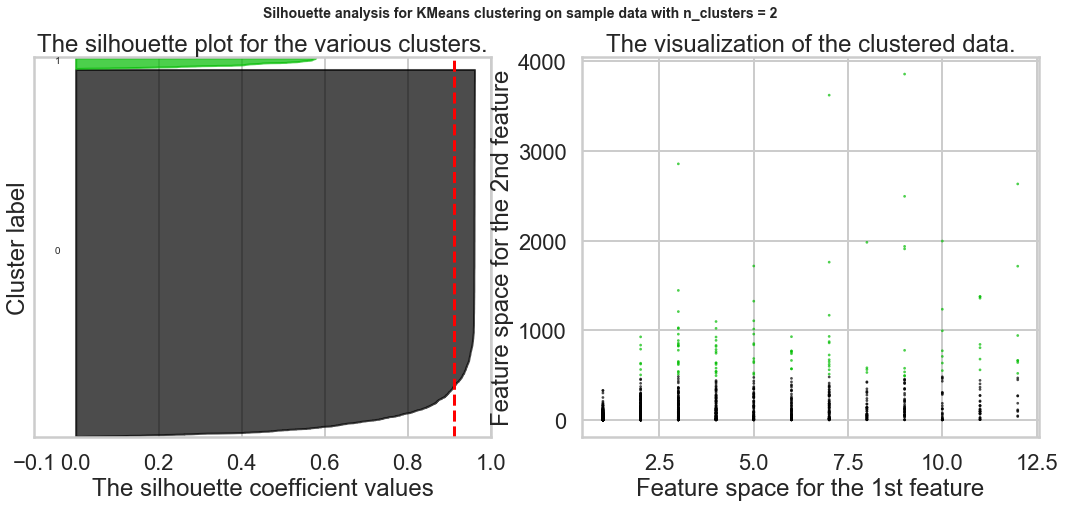

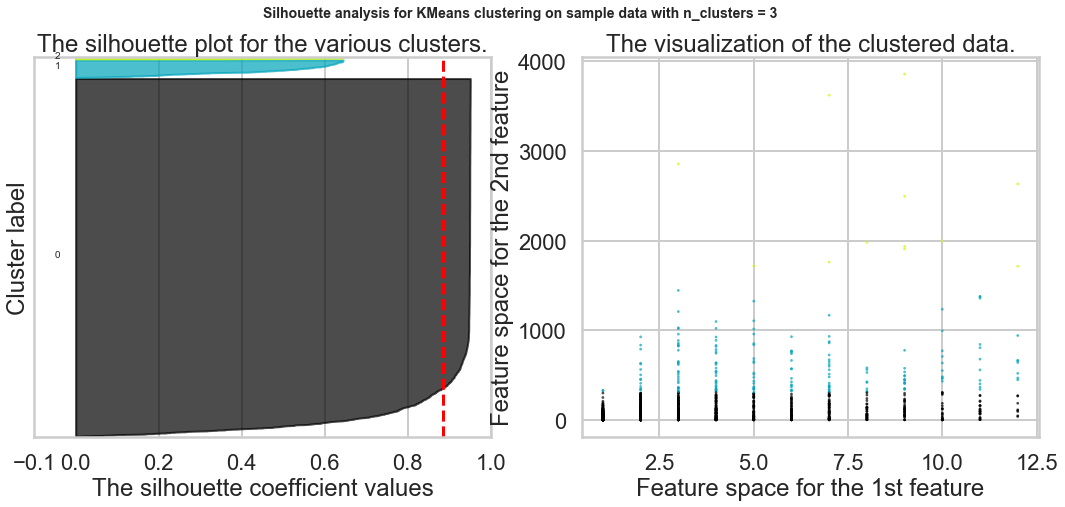

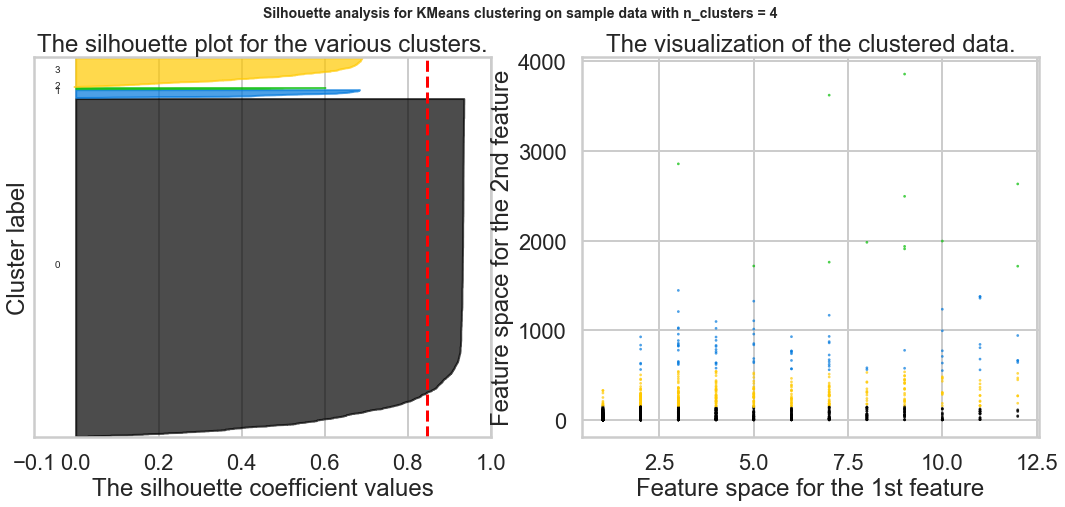

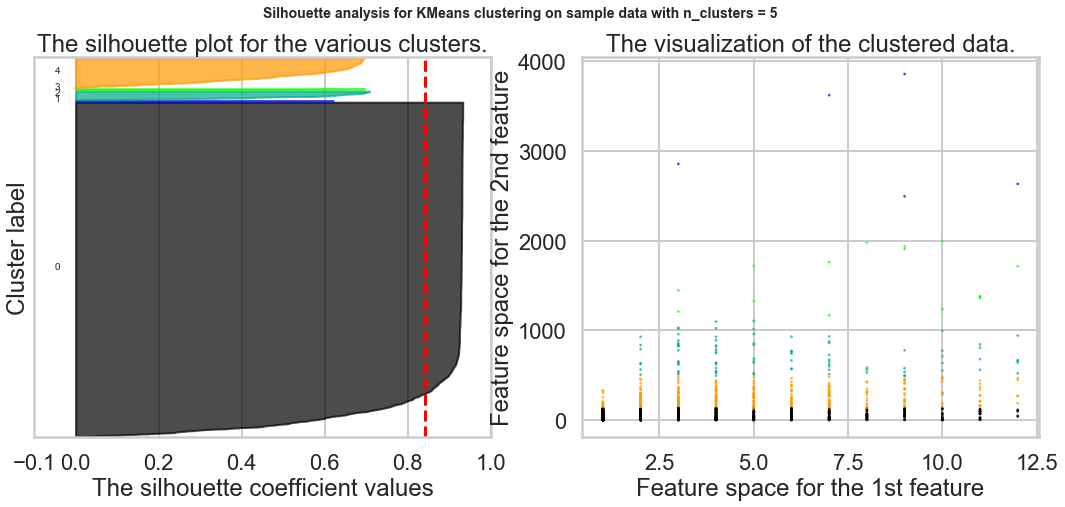

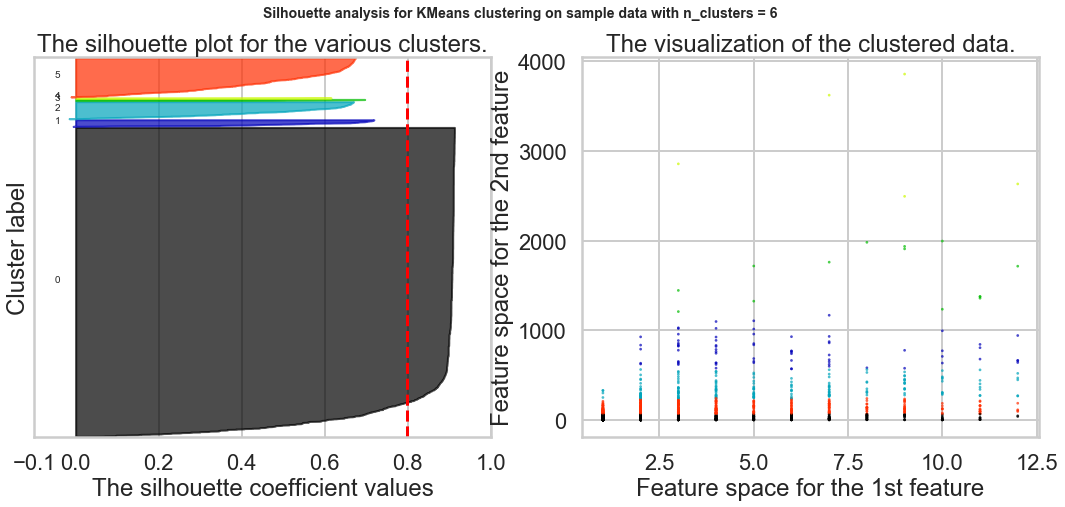

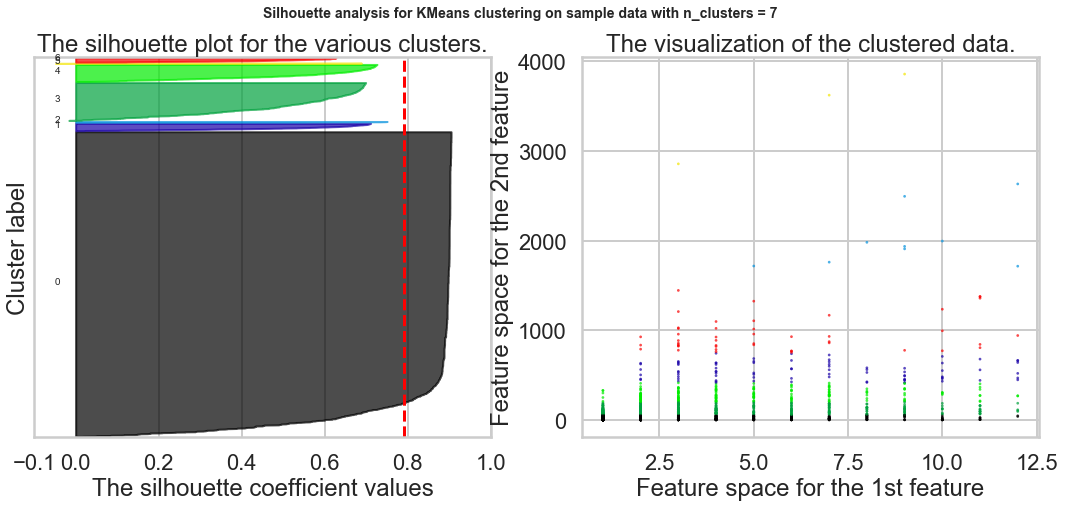

In [98]:
## Change all "X" variables to df; All changes from the original code can be found after the ###---### comments.

for n_clusters in range_of_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ### --- ###
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    ### --- ###
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    ### --- ###
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    ### --- ###
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ### --- ### 
    ax2.scatter(df["Months Active"], df["TransCt"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()